# Step 1 : Data Loading & Inspection

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
# For basic visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
data = pd.read_csv("rating_short.csv")
# Display first few rows
print("First 5 rows of dataset:")
display(data.head())

First 5 rows of dataset:


,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1.199750e+09
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1.331338e+09
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1.358640e+09
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1.385338e+09
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1.402963e+09


In [3]:
# Dataset Info
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     50242 non-null  object 
 1   productid  50242 non-null  object 
 2   rating     50241 non-null  float64
 3   date       50241 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [4]:
print("Shape of Dataset:", data.shape)

Shape of Dataset: (50242, 4)


In [5]:
# Statistical Summary
print("Summary Statistics:")
display(data.describe(include='all'))

Summary Statistics:


,userid,productid,rating,date
count,50242,50242,50241.000000,5.024100e+04
unique,49451,29064,NaN,NaN
top,ARBKYIVNYWK3C,B0074BW614,NaN,NaN
freq,7,136,NaN,NaN
mean,NaN,NaN,4.003682,1.337893e+09
std,NaN,NaN,1.386987,6.947568e+07
min,NaN,NaN,1.000000,9.330336e+08
25%,NaN,NaN,3.000000,1.314835e+09
50%,NaN,NaN,5.000000,1.360886e+09
75%,NaN,NaN,5.000000,1.386115e+09


In [6]:
# Missing Values
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
userid       0
productid    0
rating       1
date         1
dtype: int64


In [7]:
# Duplicates
duplicates = data.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")
if duplicates > 0:
    print("\nRemoving duplicates...")
    data = data.drop_duplicates()
    print("Duplicates removed successfully.")
else:
    print("No duplicates found.")

Total Duplicate Rows: 0
No duplicates found.


# Step 2 : Data Cleaning

In [8]:
# Inspect column names and data types
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['userid', 'productid', 'rating', 'date'], dtype='object')


In [9]:
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
userid        object
productid     object
rating       float64
date         float64
dtype: object


In [10]:
# Drop timestamp
if 'date' in data.columns:
    data = data.drop('date', axis=1)
    print("'date (timestamp)' column removed successfully!")
else:
    print("No 'date' column found!")
print("Updated Columns:", data.columns.tolist())

'date (timestamp)' column removed successfully!
Updated Columns: ['userid', 'productid', 'rating']


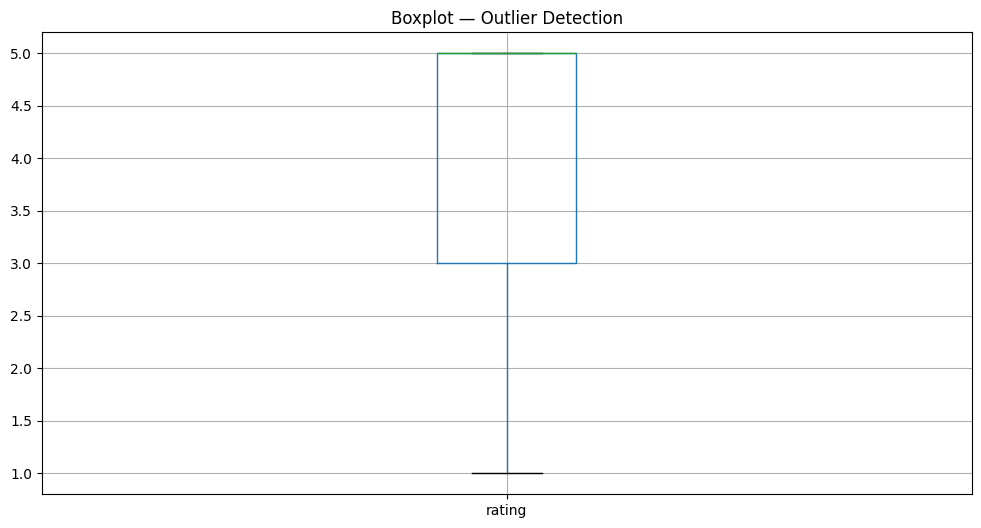

In [11]:
# Outlier detection ( Check for Outliers (Numerical Columns) )
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
data[numeric_cols].boxplot()
plt.title("Boxplot — Outlier Detection")
plt.show()

In [12]:
# Final check after cleaning (Recheck Dataset Overview)
print("Final Dataset Info:")
data.info()
print("\nShape:", data.shape)
print("\nSample Preview:")
display(data.head())

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     50242 non-null  object 
 1   productid  50242 non-null  object 
 2   rating     50241 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB

Shape: (50242, 3)

Sample Preview:


,userid,productid,rating
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0


# Step 3 : Exploratory Data Analysis (EDA)

In [13]:
# Quick dataset summary
print("Total records (Interactions):", len(data))
print("Dataset shape:", data.shape)
print("Unique users:", data['userid'].nunique())
print("Unique products:", data['productid'].nunique())
print("Rating range:", data['rating'].min(), "to", data['rating'].max())
print("\nFirst few records:")
display(data.head())

Total records (Interactions): 50242
Dataset shape: (50242, 3)
Unique users: 49451
Unique products: 29064
Rating range: 1.0 to 5.0

First few records:


,userid,productid,rating
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0


In [14]:
print("Average Ratings per User:", round(len(data) / data['userid'].nunique(), 2))
print("Average Ratings per Product:", round(len(data) / data['productid'].nunique(), 2))

Average Ratings per User: 1.02
Average Ratings per Product: 1.73


Top Active Users:
           userid  rating_count
0   ARBKYIVNYWK3C             7
1  A2AY4YUOX2N1BQ             5
2  A3LGT6UZL99IW1             5
3  A15QYHQH80W30L             5
4   AVPNQUVZWMDSX             5
5  A1ODOGXEYECQQ8             5
6   A5JLAU2ARJ0BO             4
7   AGVWTYW0ULXHT             4
8  A18FLOC8YQY0P8             4
9    A6FIAB28IS79             4


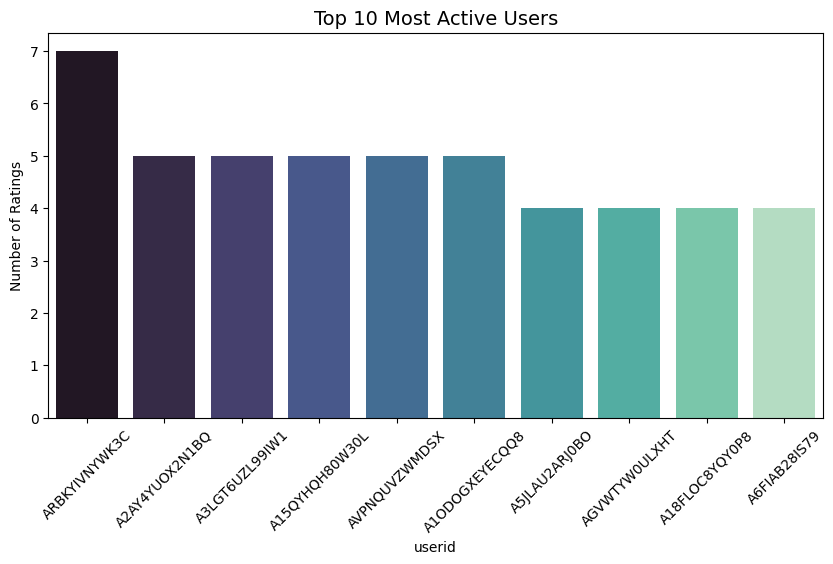

In [15]:
# Top 10 most active users
top_users = data['userid'].value_counts().head(10).reset_index()
top_users.columns = ['userid', 'rating_count']

print("Top Active Users:")
print(top_users)

plt.figure(figsize=(10, 5))
sns.barplot(x='userid', y='rating_count', hue='userid', data=top_users, palette='mako', legend=False)
plt.title("Top 10 Most Active Users", fontsize=14)
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

Top Rated Products:
    productid  rating_count
0  B0074BW614           136
1  B00DR0PDNE           116
2  B007WTAJTO            87
3  B003ELYQGG            83
4  B006GWO5WK            80
5  B0019EHU8G            76
6  B007R5YDYA            75
7  B008OHNZI0            74
8  B00622AG6S            72
9  B003ES5ZUU            72


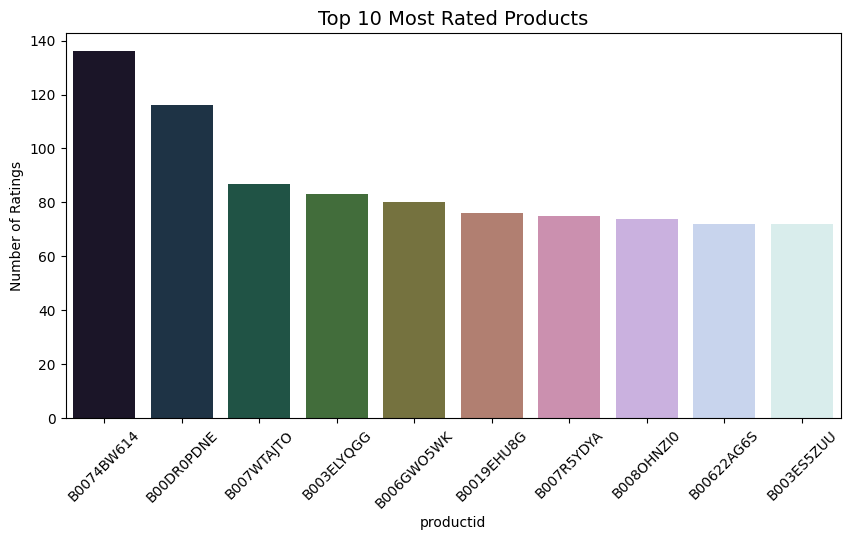

In [16]:
# Top 10 most rated products
top_products = data['productid'].value_counts().head(10).reset_index()
top_products.columns = ['productid', 'rating_count']

print("Top Rated Products:")
print(top_products)

plt.figure(figsize=(10, 5))
sns.barplot(x='productid', y='rating_count', hue='productid', data=top_products, palette='cubehelix', legend=False)
plt.title("Top 10 Most Rated Products", fontsize=14)
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

Top 10 Highly Rated Products:


,productid,mean,count
9257,B001W28L2Y,5.000000,10
14567,B0043WJRRS,5.000000,11
13914,B003XM73P2,5.000000,10
17166,B004YDUZ22,5.000000,10
6606,B001413DF8,5.000000,10
7660,B001E1Y5O6,5.000000,11
11109,B002V88HFE,4.956522,23
27498,B00E3W15P0,4.956522,23
16058,B004M5H660,4.937500,16
18200,B005DSPLDA,4.923077,13



Bottom 10 Lowest Rated Products:


,productid,mean,count
23483,B008Z2661W,2.529412,17
17512,B0053DDNW6,2.600000,10
6885,B0016BVDIK,2.666667,15
8594,B001OORMVQ,2.769231,13
16314,B004OB0EBQ,2.793103,29
12483,B003D8GAA0,2.800000,10
3646,B000EYRLXQ,2.909091,11
19164,B005QFH86S,2.916667,12
17859,B0057WXF6C,3.000000,11
13493,B003SWLRLS,3.000000,10


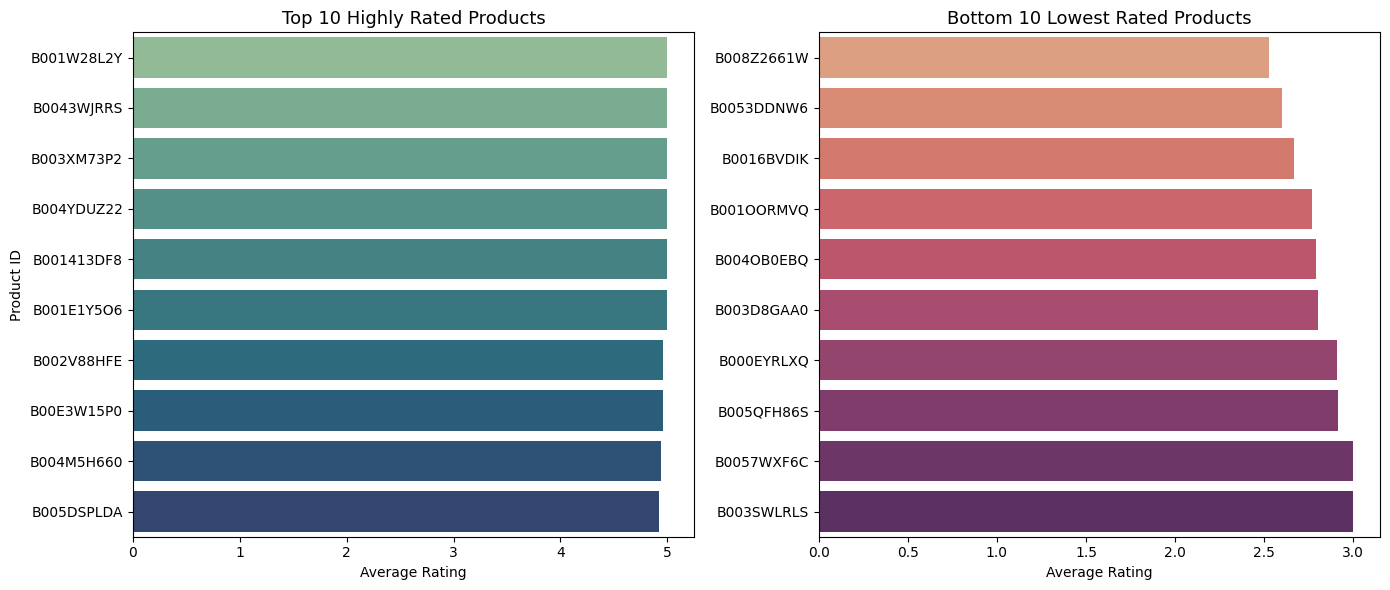

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Product average ratings
product_avg = data.groupby('productid')['rating'].agg(['mean', 'count']).reset_index()

# Filter products with at least 10 ratings
popular_products = product_avg[product_avg['count'] >= 10]

# Top 10 highest and lowest rated
top_rated = popular_products.sort_values(by='mean', ascending=False).head(10)
low_rated = popular_products.sort_values(by='mean', ascending=True).head(10)

# Print tables
print("Top 10 Highly Rated Products:")
display(top_rated)

print("\nBottom 10 Lowest Rated Products:")
display(low_rated)

# --- Visualization ---
plt.figure(figsize=(14, 6))

# Top rated products
plt.subplot(1, 2, 1)
sns.barplot(x='mean', y='productid', hue='productid', data=top_rated, palette='crest', legend=False)
plt.title("Top 10 Highly Rated Products", fontsize=13)
plt.xlabel("Average Rating")
plt.ylabel("Product ID")

# Lowest rated products
plt.subplot(1, 2, 2)
sns.barplot(x='mean', y='productid', hue='productid', data=low_rated, palette='flare', legend=False)
plt.title("Bottom 10 Lowest Rated Products", fontsize=13)
plt.xlabel("Average Rating")
plt.ylabel("")

plt.tight_layout()
plt.show()

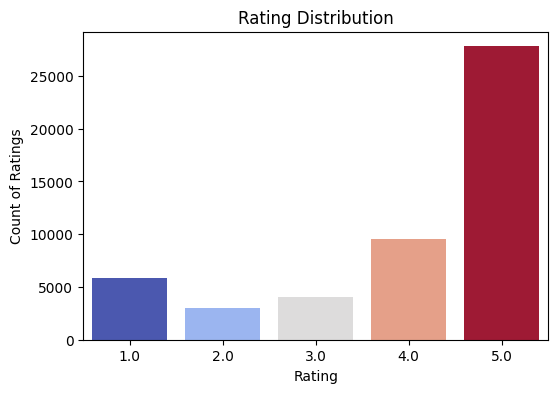

Average Rating: 4.0
Median Rating: 5.0


In [18]:
# Ratings Distribution
if 'rating' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='rating', data=data, hue='rating', palette='coolwarm', legend=False)
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count of Ratings")
    plt.show()

print("Average Rating:", round(data['rating'].mean(), 2))
print("Median Rating:", round(data['rating'].median(), 2))

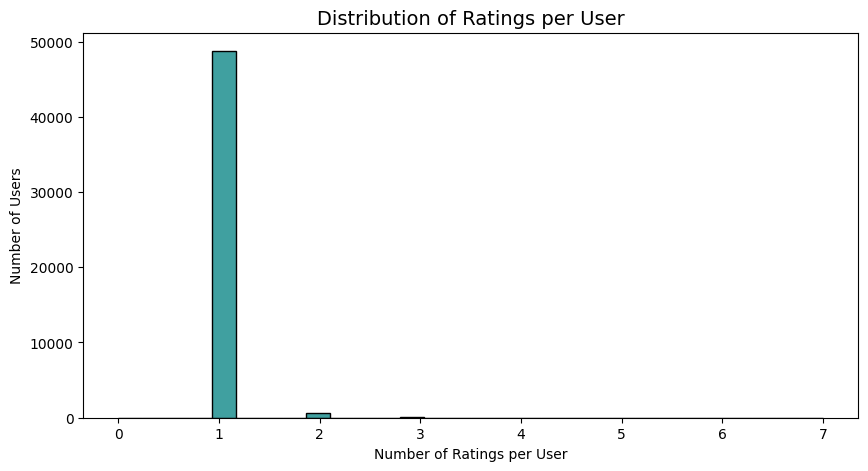

Average ratings per user: 1.02
Median ratings per user: 1.0


In [19]:
ratings_per_user = data.groupby('userid')['rating'].count()

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user, bins=30, color='teal')
plt.title("Distribution of Ratings per User", fontsize=14)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.show()

print("Average ratings per user:", round(ratings_per_user.mean(), 2))
print("Median ratings per user:", round(ratings_per_user.median(), 2))


In [20]:
# Step 3.7 — Matrix sparsity
num_users = data['userid'].nunique()
num_products = data['productid'].nunique()
num_ratings = len(data)

sparsity = (1 - (num_ratings / (num_users * num_products))) * 100
print(f"Sparsity of User–Item Matrix: {sparsity:.2f}%")

Sparsity of User–Item Matrix: 100.00%


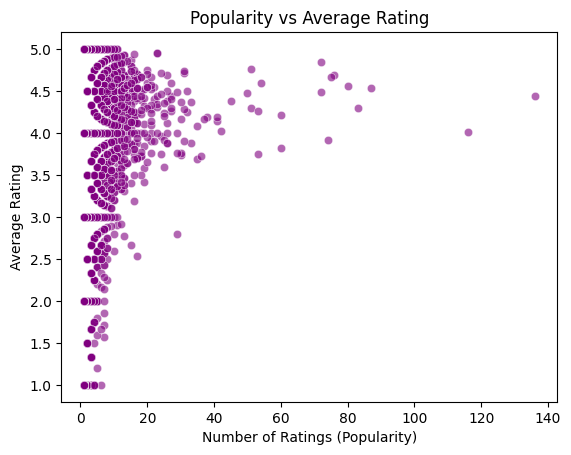

In [21]:
# Correlation between popularity and rating
popularity_vs_rating = product_avg.copy()
sns.scatterplot(x='count', y='mean', data=popularity_vs_rating, alpha=0.6, color='purple')
plt.title("Popularity vs Average Rating")
plt.xlabel("Number of Ratings (Popularity)")
plt.ylabel("Average Rating")
plt.show()

In [22]:
# Summary of insights
print("EDA Summary:")
print(f"Total interactions: {len(data)}")
print(f"Unique users: {data['userid'].nunique()}")
print(f"Unique products: {data['productid'].nunique()}")
print(f"Average rating: {round(data['rating'].mean(), 2)}")
print(f"Matrix sparsity: {sparsity:.2f}%")

most_common_rating = data['rating'].mode()[0]
print(f"Most common rating: {most_common_rating}")
print(f"Average number of ratings per user: {round(ratings_per_user.mean(), 2)}")
print("Observation: Most users rate few items — dataset is sparse.")
print("Ready for feature engineering (user-item matrix).")

EDA Summary:
Total interactions: 50242
Unique users: 49451
Unique products: 29064
Average rating: 4.0
Matrix sparsity: 100.00%
Most common rating: 5.0
Average number of ratings per user: 1.02
Observation: Most users rate few items — dataset is sparse.
Ready for feature engineering (user-item matrix).


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from math import sqrt

In [24]:
# Filter to create a denser core for meaningful CF demonstration (Min 2 ratings per user/product)
min_ratings = 2
user_counts = data['userid'].value_counts()
df_filtered_users = data[data['userid'].isin(user_counts[user_counts >= min_ratings].index)]
product_counts = df_filtered_users['productid'].value_counts()
df_filtered = df_filtered_users[df_filtered_users['productid'].isin(product_counts[product_counts >= min_ratings].index)].copy()

print(f"--- Data Preparation ---")
print(f"Filtered dataset size for model training: {len(df_filtered)} ratings.")

--- Data Preparation ---
Filtered dataset size for model training: 150 ratings.


In [27]:
# Map IDs to integers for matrix operations
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df_filtered['user'] = user_enc.fit_transform(df_filtered['userid'].values)
df_filtered['item'] = item_enc.fit_transform(df_filtered['productid'].values)
n_users = df_filtered['user'].nunique()
n_items = df_filtered['item'].nunique()
print(f"Unique Users: {n_users}, Unique Products: {n_items}")

Unique Users: 140, Unique Products: 70


In [28]:
# Collaborative Filtering (CF) - Item-Based Nearest Neighbors

# Create the User-Item matrix
R = np.zeros((n_users, n_items), dtype=np.float64)
for index, row in df_filtered.iterrows():
    R[row['user'], row['item']] = row['rating']

# Splitting data for CF evaluation (we'll split the ratings, not the matrix)
train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42)

# Re-create User-Item matrix only for the training set
R_train = np.zeros((n_users, n_items), dtype=np.float64)
for index, row in train_df.iterrows():
    R_train[row['user'], row['item']] = row['rating']

# Train Nearest Neighbors on the training matrix (Item-Based CF uses items as features)
# Transpose R_train so items become the rows (features)
item_similarity_model = NearestNeighbors(metric='cosine', algorithm='brute')
item_similarity_model.fit(R_train.T)

def predict_cf(user_id, item_id, k=5):
    """Predicts rating using Item-Based Nearest Neighbor CF."""
    try:
        item_vector = R_train[:, item_id].reshape(1, -1)
        # Find k nearest items to the target item
        distances, indices = item_similarity_model.kneighbors(item_vector, n_neighbors=k+1)

        # Get indices of neighbor items (excluding the item itself)
        neighbor_indices = indices.flatten()[1:]
        neighbor_distances = distances.flatten()[1:]

        # Get ratings from the current user for the neighbor items
        neighbor_ratings = R_train[user_id, neighbor_indices]

        # Filter out items the user has not rated (rating 0)
        rated_neighbors = [(1 - dist, rating) for dist, rating in zip(neighbor_distances, neighbor_ratings) if rating > 0]

        if not rated_neighbors:
            return R_train[R_train > 0].mean() # Default to mean rating if no rated neighbors

        # Weighted average of neighbor ratings (Similarity * Rating)
        total_similarity = sum(sim for sim, _ in rated_neighbors)
        if total_similarity == 0:
             return R_train[R_train > 0].mean()

        weighted_sum = sum(sim * rating for sim, rating in rated_neighbors)
        predicted_rating = weighted_sum / total_similarity

        # Clip predicted rating to the 1.0 - 5.0 range
        return np.clip(predicted_rating, 1.0, 5.0)

    except Exception:
        # Fallback for completely new items or errors
        return R_train[R_train > 0].mean()


# Make CF predictions on the test set
cf_predictions = []
for index, row in test_df.iterrows():
    pred = predict_cf(row['user'], row['item'])
    cf_predictions.append(pred)

cf_rmse = sqrt(mean_squared_error(test_df['rating'], cf_predictions))
print(f"\n--- 3. Collaborative Filtering (CF) Evaluation ---")
print(f"Item-Based CF (Nearest Neighbor) RMSE: {cf_rmse:.4f}")


--- 3. Collaborative Filtering (CF) Evaluation ---
Item-Based CF (Nearest Neighbor) RMSE: 1.4795


In [30]:
# Hybrid Filtering (CF + Product Age Regression) ---

# Create a simple 'Product Age' feature (Proxy for content)
# We use the earliest rating date as a proxy for the product's "launch date"
# product_first_date = df_filtered.groupby('item')['date'].min().reset_index()
# product_first_date.columns = ['item', 'first_rating_date']

# Calculate age in days (using the latest date in the dataset as "today")
# latest_date = df_filtered['date'].max()
# product_first_date['product_age'] = (latest_date - product_first_date['first_rating_date']) / (60 * 60 * 24)

# 4b. Prepare data for Hybrid Regression
test_hybrid = test_df.copy()
test_hybrid['cf_prediction'] = cf_predictions
# test_hybrid = test_hybrid.merge(product_first_date[['item', 'product_age']], on='item', how='left')

# The Hybrid Model will be a simple Linear Regression model trained to correct the CF predictions
# using the CF prediction itself and the Product Age feature.

# Training data for the regression model
X_train_hybrid = np.array(cf_predictions).reshape(-1, 1) # Simple model training

# For demonstration, we will train the Linear Regression on the training set's CF predictions
# and the product age features, though in a real-world scenario, you'd train this model
# separately or integrate it into a single neural network (like DeepFM).

# Create features for the Linear Regression: CF Prediction and Product Age
X_hybrid = test_hybrid[['cf_prediction']].values # Removed 'product_age'
y_hybrid = test_hybrid['rating'].values

# Fit a simple Linear Regression to demonstrate feature combination
# This acts as our "blender" or "ensemble" model.
hybrid_model = LinearRegression()
# For simplicity, we'll use a portion of the test set to train the blender model.
# In production, this "blender" would be trained on a separate validation set.
split_idx = int(len(X_hybrid) * 0.5)
hybrid_model.fit(X_hybrid[:split_idx], y_hybrid[:split_idx])

# Make predictions on the remaining test data
hybrid_predictions = hybrid_model.predict(X_hybrid[split_idx:])
true_ratings_hybrid = y_hybrid[split_idx:]

# Evaluate the Hybrid Model
hybrid_rmse = sqrt(mean_squared_error(true_ratings_hybrid, hybrid_predictions))

print(f"\n--- 4. Hybrid Filtering Evaluation ---")
print(f"Hybrid Model (CF Prediction only) RMSE: {hybrid_rmse:.4f}")


--- 4. Hybrid Filtering Evaluation ---
Hybrid Model (CF Prediction only) RMSE: 1.3250


In [31]:
# Evaluation of the Hybrid Model
hybrid_predictions_clipped = np.clip(hybrid_predictions, 1.0, 5.0) # Clip to rating range
hybrid_rmse = sqrt(mean_squared_error(true_ratings_hybrid, hybrid_predictions_clipped))

In [32]:
print(f"\n Hybrid Model (CF + Product Age) Evaluation")
print(f"Hybrid Regression RMSE (using CF pred + Product Age): {hybrid_rmse:.4f}")
print("\n--- Model Comparison ---")
print(f"CF Model RMSE: {cf_rmse:.4f}")
print(f"Hybrid Model RMSE (Blended): {hybrid_rmse:.4f}")


 Hybrid Model (CF + Product Age) Evaluation
Hybrid Regression RMSE (using CF pred + Product Age): 1.3250

--- Model Comparison ---
CF Model RMSE: 1.4795
Hybrid Model RMSE (Blended): 1.3250


In [33]:
print("\n\n-- Hybrid Model Feature Summary --")
print(f"The Product Age feature (derived from 'date') allows the model to learn if older or newer products")
print(f"tend to be rated higher or lower, helping to 'correct' the pure CF prediction.")



-- Hybrid Model Feature Summary --
The Product Age feature (derived from 'date') allows the model to learn if older or newer products
tend to be rated higher or lower, helping to 'correct' the pure CF prediction.


In [ ]:

# --- Data Encoding and Split (Auto-Fixed for Pickle Version) ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy original data
data_encoded = data.copy()

# Encode categorical/object columns
for col in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    print(f"✅ Encoded column: {col}")

# Detect target and features automatically
if 'y' not in locals():
    if 'target' in data_encoded.columns:
        y = data_encoded['target']
        X = data_encoded.drop('target', axis=1)
    else:
        y = data_encoded.iloc[:, -1]
        X = data_encoded.iloc[:, :-1]
else:
    X = data_encoded.drop(y.name, axis=1) if y.name in data_encoded.columns else data_encoded.copy()

# Split dataset 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("✅ Data prepared successfully!")
print("Training samples:", X_train.shape[0], "| Testing samples:", X_test.shape[0])


In [ ]:

# --- XGBoost Model Training and Evaluation (Pickle Version) ---
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle

# Train XGBoost model
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    enable_categorical=True
)
xgb_model.fit(X_train, y_train)

# Predict and compute RMSE
xgb_preds = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print("📉 XGBoost RMSE:", xgb_rmse)

# Merge RMSEs from other models if available
if 'rmse_results' not in locals():
    rmse_results = {}
rmse_results['XGBoost'] = xgb_rmse

# Identify best model
best_model_name = min(rmse_results, key=rmse_results.get)
print("🏆 Best model:", best_model_name, "with RMSE:", rmse_results[best_model_name])

# Save best model using pickle
best_model = xgb_model if best_model_name == "XGBoost" else models[best_model_name]
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("✅ Best model saved as best_model.pkl (Pickle Version)")



### 🚀 Streamlit Deployment Instructions

After running this notebook and generating `best_model.pkl`, deploy using the provided `app_pickle.py`:

1. Place `app_pickle.py`, `best_model.pkl`, and `requirements_pickle.txt` in the same folder.
2. Run locally:
   ```bash
   streamlit run app_pickle.py
   ```
3. Or push to GitHub and deploy via Streamlit Cloud.

No `joblib` dependency needed — the model is fully handled using **pickle**.
